# ELE510 Image Processing and Computer Vision: LAB, Exercise 2, Histogram and point transformations

**Purpose:** *To learn about the image histogram, histogram equalization and image noise.*

Read the text carefully before starting the work. In many cases it is necessary to do some preparations before you start the work on the computer. Read the necessary theory and answer the theoretical part first. The theoretical and experimental part should be solved individually. The notebook must be approved by the lecturer or the teaching assistants. 

The theory for this exercise can be found in chapters 1 and 2 of the textbook [1]. Supplementary information can found in chapter 1, 2 and 3 in the compendium [2]. See also the following documentation for help:
- [OpenCV](https://docs.opencv.org/4.8.0/d6/d00/tutorial_py_root.html)
- [numpy](https://numpy.org/doc/stable/)
- [matplotlib](https://matplotlib.org/stable/users/index.html)

<div class="alert alert-block alert-info">
Please, make sure that you have previously installed all the packages contained in the `requirements.txt` file.
</div>

**Approval:**
<div class="alert alert-block alert-success">
The current notebook should be submitted on CANVAS as a single PDF file. Read the `ELE510_Getting_started.pdf` file for more information.
</div>

## Note regarding the notebook

- You will find placeholders marked with `...` throughout the code. Your task is to replace each `...` with the appropriate code. Ensure that each placeholder is properly filled in to complete the implementation.

- The theoretical questions have to be answered directly on the notebook using the *Markdown* cells marked as **Answer here**. LaTex commands (if relevant) are available using the command `$...$`. You can also attach a scan (or an image) of the answer directly in the cell.

Possible ways to insert an image in the markdown cell:

`![image name]("image_path")`

`<img src="image_path" alt="Alt text" title="Title text" />`

In [1]:
# Import the packages
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt 

## Problem 1

The histogram for an image of a **black** rectangular triangle and **white** background is $[5600,980,10,0,0,40,11200,80000]$, where 8 gray levels are used going from 0 (black) to 255 (white). The base of the triangle is $b = 100\text{mm}$ and the height is $h=300\text{mm}$. Use this information to find the pixel size $\Delta x$ in milimeters assuming that pixels are square ($\Delta x = \Delta y$).

**Describe the steps to arrive to the solution.**

- Area of triangle = 1/2 x base x height
- histogram = [5600,980,10,0,0,40,11200,80000]
- i would assume first half of the histogram is black and rest is white.
- so the dark part would be calculated as follows
- 5600 + 980 + 10 + 0 = 6590 pixels
- area of triangle = 1/2 x 100 x 300 = 15000mm^2
- pixel is represented by $\Delta x$ = $\Delta y$ lets say x^2
- number of pixels x area of a pixel = total pixels in triangle 
- 6590 x $\Delta x$^2 = 15000
- x^2 = 2.2761mm
- x = 1.15mm approx 

## Problem 2

For images, such as *./images/christmas.png*, some processing is normally desired to improve the contrast. The simplest approach for doing this is called histogram stretching. For a given image, where the used pixel values range from $g_{\text{min}}$ to $g_{\text{max}}$ we can spread these so they cover the entire $[0, G-1]$ range. The formula for histogram stretching is given by:

\begin{equation*}
	g_{\text{new}} = \left\lfloor {\frac{g_{\text{old}}-g_{\text{min}}}{g_{\text{max}}-g_{\text{min}}}G + 0.5} \right\rfloor
\end{equation*}

Where $g_{\text{old}}$ is an old pixel value, and $g_{\text{new}}$ a new pixel value.

Make a small Python function, taking an image as input, perform histogram stretching using the previous equation, and giving the increased contrast image as output. Use an 8-bit grayscale range (G=255). Show and explain the result using `./images/christmas.png` as an example. 

In [3]:
"""
Function that takes in input an image and return the same image stretched.
"""
def histogram_stretch(img):
    G = 255 # number of grey levels
    g_min = np.min(img)
    g_max = np.max(img)
    img_stretch = ((img - g_min) / (g_max - g_min) * G + 0.5).astype(np.uint8) # store this variable as uint8
    
    return img_stretch

In [14]:
# Read the image and convert it to RGB channels
imagepath = "./images/christmas.png"
img_bgr = cv2.imread(imagepath)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

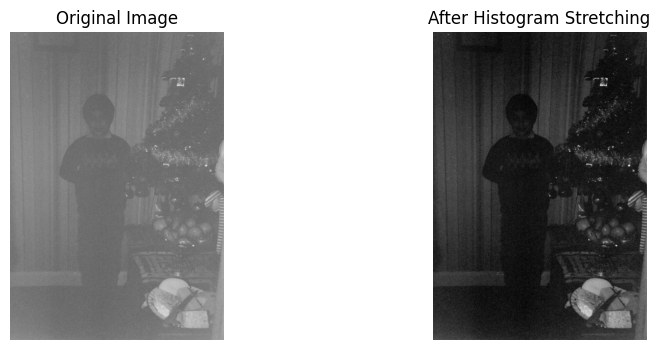

In [15]:
img_stretch = histogram_stretch(img_rgb)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img_rgb, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_stretch, cmap='gray')
plt.title("After Histogram Stretching")
plt.axis("off")

plt.show()

### much clearer 

## Problem 3

In this experiment we use **four** images. 
The two first are gray level images, `./images/pout.jpg` and `./images/tire.jpg`. 
The other two are colour images captured with a standard digital camera. 
We want to study image enhancement with histogram equalization. 

*We simplify by using only gray level images*. 
Therefore, the colour images are first read to gray level; a grey level image can be imported using the flag (`cv2.IMREAD_GRAYSCALE`). 
The colour images are `./images/waterfall2.jpg` and `./images/restaurantSpain.jpg`, available from CANVAS.

**a)**  Make a Python function that does histogram equalization with `cv2.equalizeHist()`. This function will include the estimation of the actual histogram, the performance of histogram equailization, and the estimation of the cumulative distribution function (CDF) for both cases.

**Tips**:
- Use 256 bins when estimating the histogram (one per gray level).
- The CDF of the histogram can be easily estiamted wit hthe `cumsum()` method.

In [16]:
"""
Function that takes in input the image name, perform an histogram equalization and display the results.
"""
def showhisteq(imgname):
    # Read the image in grayscale
    img = cv2.imread(imgname, cv2.IMREAD_GRAYSCALE)

    # Compute histogram equalization
    outimg = cv2.equalizeHist(img)

    # Plot Images
    plt.figure(figsize=(10,10))
    plt.subplot(221)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title('Input image')
    plt.subplot(222)
    plt.imshow(outimg, cmap='gray', vmin=0, vmax=255)
    plt.title('Output image')

    # Compute input histogram
    input_hist, input_bin = np.histogram(img.flatten(), 256, [0,256])
    cdf_input = input_hist.cumsum()
    cdf_input_normalized = cdf_input / cdf_input.max() # Between 0 and 1
    
    # Compute output histogram (equalized)
    output_hist, output_bin = np.histogram(outimg.flatten(), 256, [0,256])
    cdf_output = output_hist.cumsum()
    cdf_output_normalized = cdf_output / cdf_output.max() # Between 0 and 1

    # Plot histograms
    plt.subplot(223)
    plt.bar(input_bin[:-1], input_hist, width=np.diff(input_bin), color = 'b')
    plt.xlim([0,256])
    plt.tick_params(axis='both', labelsize=8)
    plt.gca().twinx()
    plt.plot(cdf_input_normalized, color = 'r')
    plt.tick_params(axis='y', labelcolor='r', labelsize=8)
    plt.legend(('CDF','Histogram'), loc = 'upper left')
    plt.title('Input histogram')
    
    plt.subplot(224)
    plt.bar(output_bin[:-1], output_hist, width=np.diff(output_bin), color = 'b')
    plt.xlim([0,256])
    plt.tick_params(axis='both', labelsize=8)
    plt.gca().twinx()
    plt.plot(cdf_output_normalized, color = 'r')
    plt.tick_params(axis='y', labelcolor='r', labelsize=8)
    plt.legend(('CDF','Histogram'), loc = 'upper left')
    plt.title('Output histogram')
    plt.show()
    

**b)** Perform histogram equalization over these images. Discuss the effect of the equalization over the histogram and its CDF.

**Answer here**

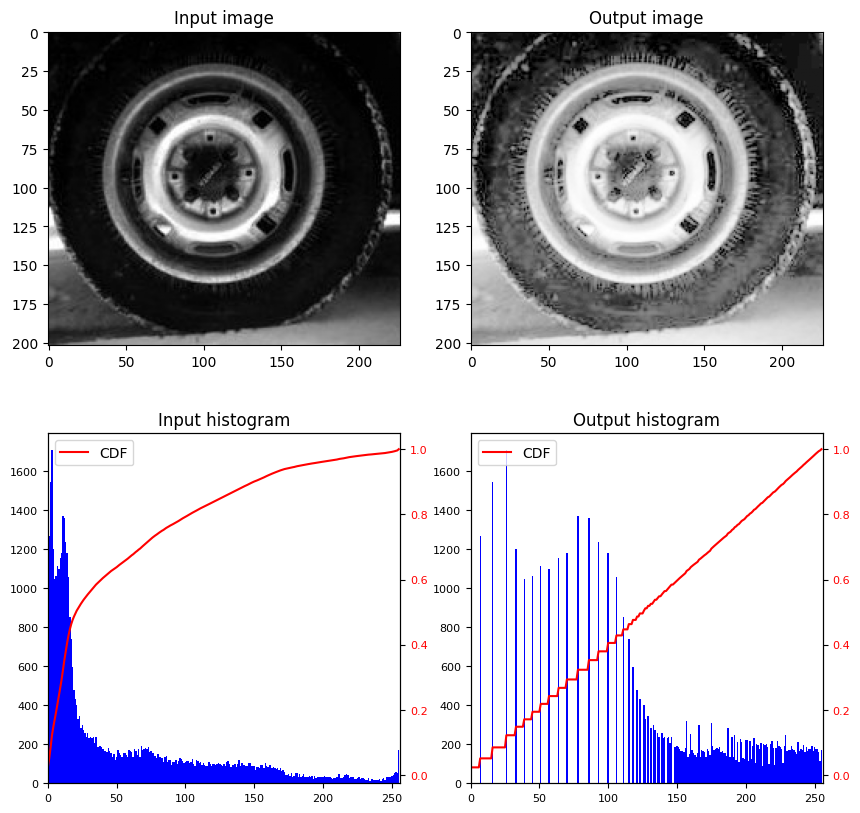

In [17]:
# Read 'tire.jpg'
imagepath = os.path.join("./images/tire.jpg")
showhisteq(imagepath)

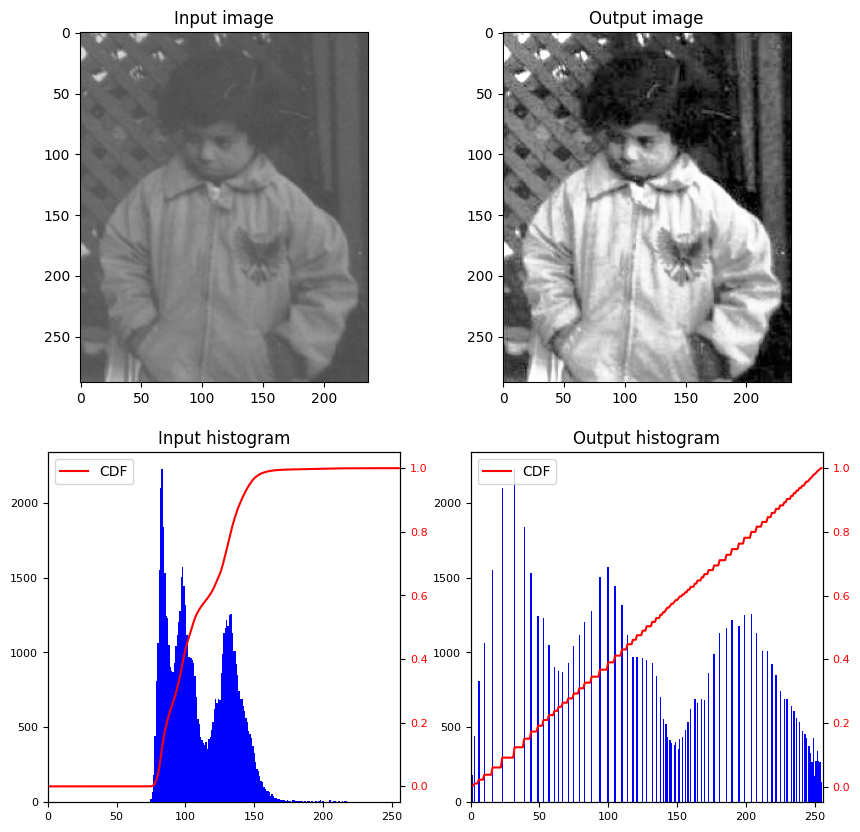

In [18]:
# Read 'pout.jpg'
imagepath = os.path.join("./images/pout.jpg")
showhisteq(imagepath)

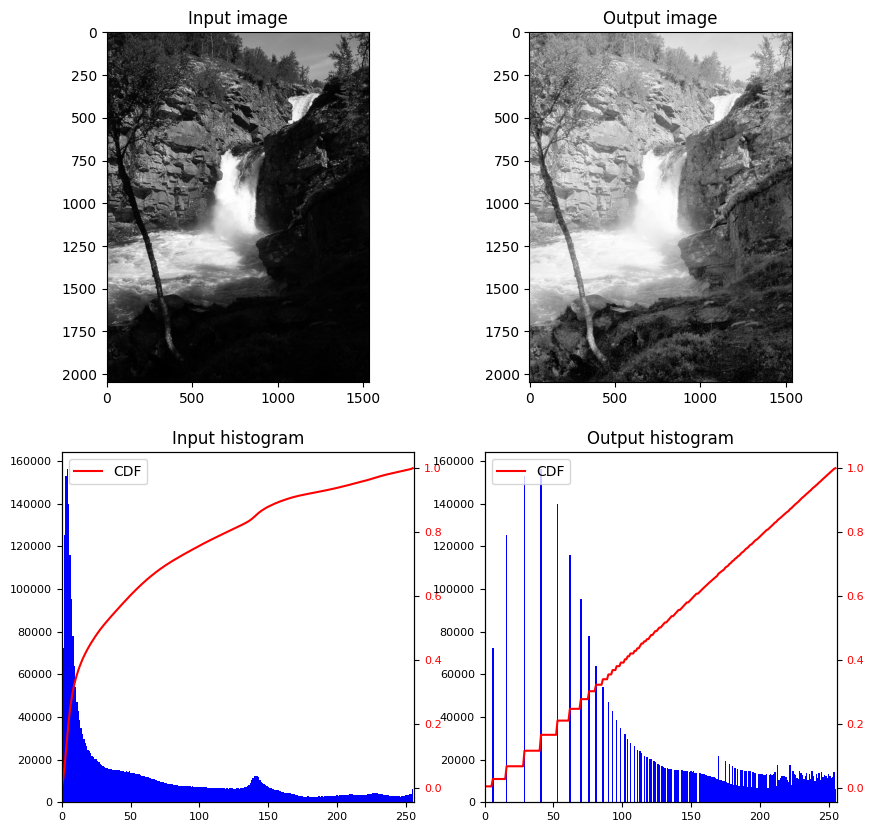

In [19]:
# Read 'waterfall2.jpg'
imagepath = os.path.join("./images/waterfall2.jpg")
showhisteq(imagepath)

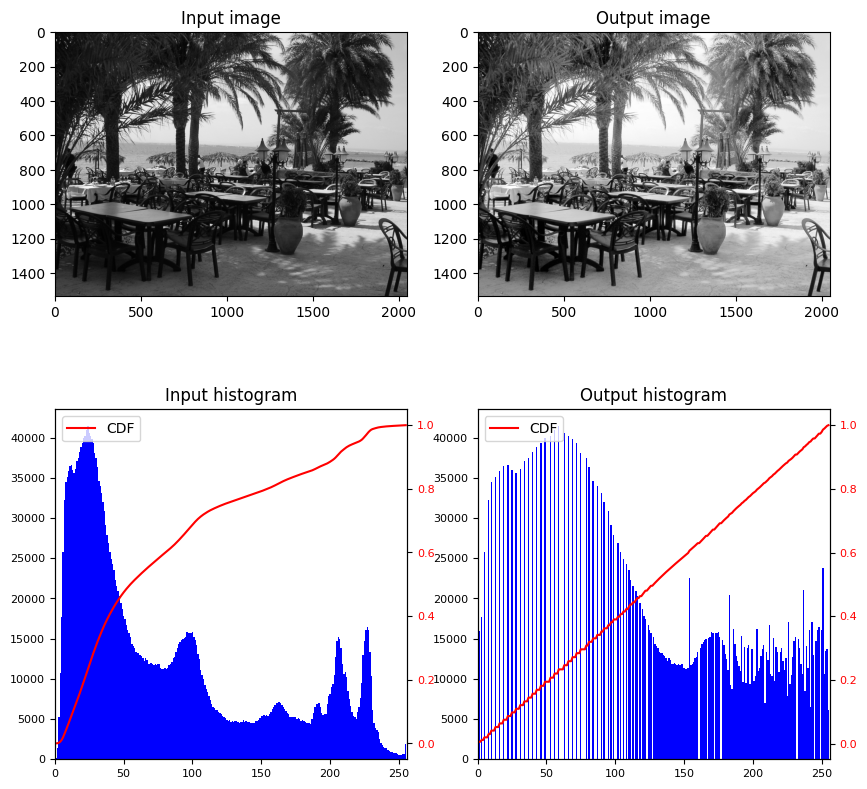

In [20]:
# Read 'restaurantSpain.jpg'
imagepath = os.path.join("./images/restaurantSpain.jpg")
showhisteq(imagepath)

**c)** Explain why the discrete histogram equalization usually do not give a completely flat histogram.

Descrete values and finite number of pixels(cant divide the pixels).

## Problem 4

Noise is a common problem in digital images. In this problem we want to study estimation of camera noise. We have a set of $K$ images. The only difference between the images is the noise value at each pixel. 

Assume that the noise is additive and uncorrelated with the gray values of the image such that for each image point we have $g_{k} = f + \eta_{k},\, k = 1, 2, \;\cdots\;,K$, where $g_{k}$ is image number $k$ with noise $\eta_{k}$. 

The image without noise, $f$, is unchanged (here we have not shown the indexes $(x,y)$). 
The mean image is given by the average value:

\begin{equation}
    \overline{g(x,y)} = \frac{1}{K}\sum_{k = 1}^{K}g_{k}(x,y).
\end{equation}

Then it can be shown that

\begin{equation}
    E\{\overline{g(x,y)}\} = f(x,y)
\end{equation}

and

\begin{equation}
    \sigma^{2}_{\overline{g(x,y)}} = \frac{1}{K}\;\sigma^{2}_{\eta(x,y)}.
\end{equation}


Show how to derive these two results using the first equation and the information given in the text.


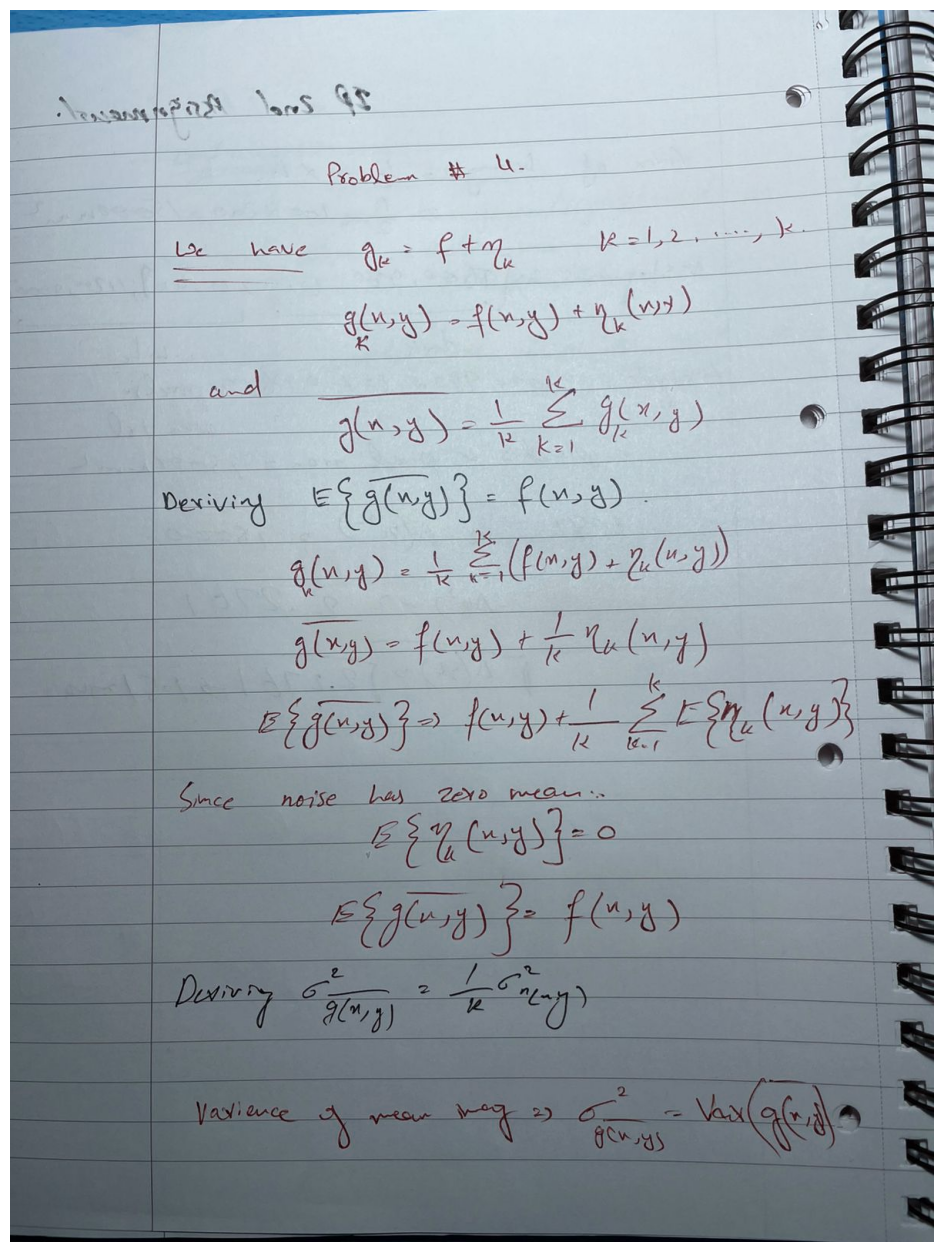

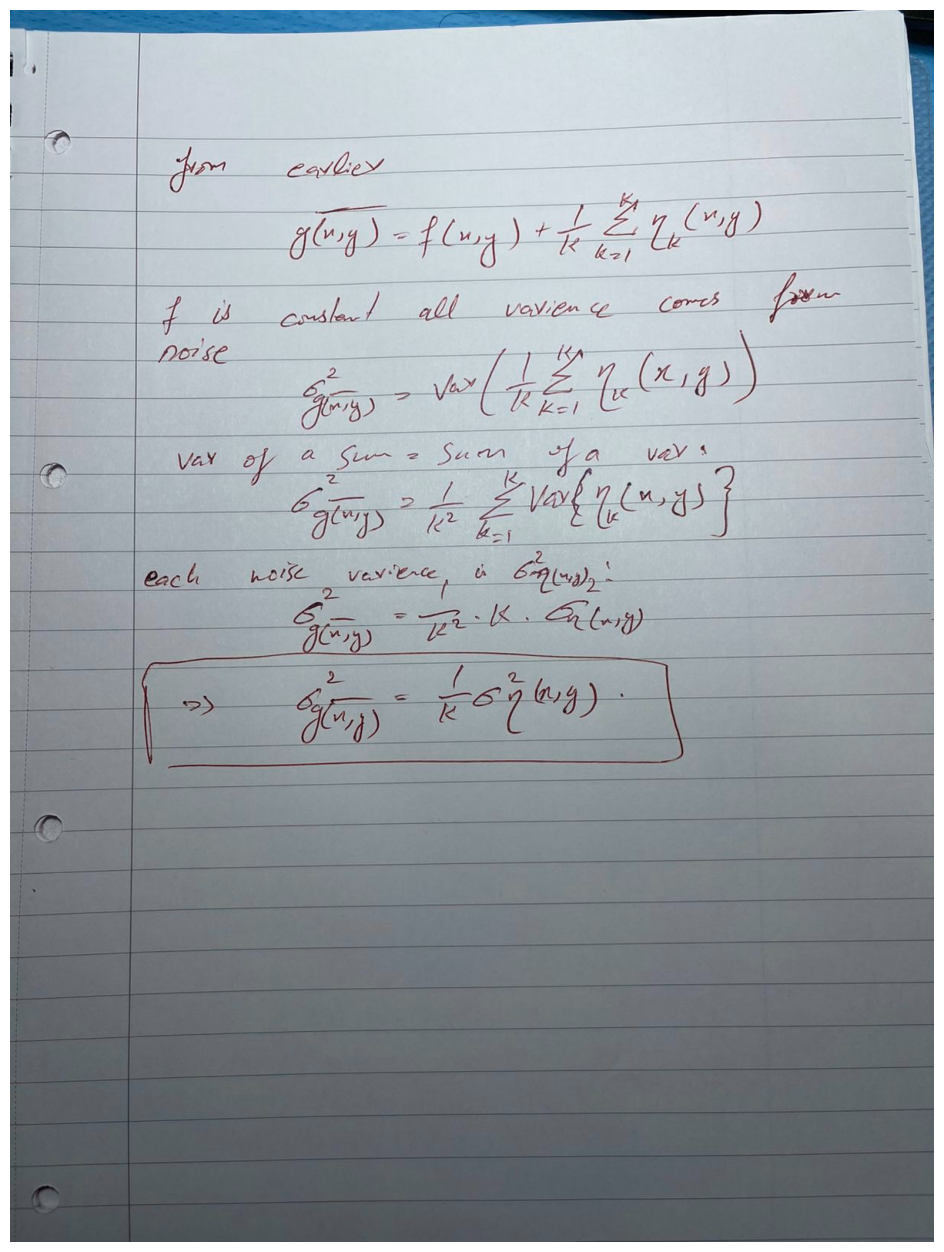

In [25]:
img1 = cv2.imread("./images/page1.jpg")
img2 = cv2.imread("./images/page2.jpg")
plt.figure(figsize=(16, 16))
plt.imshow(img1, cmap="gray")
plt.axis("off")
plt.show()
plt.figure(figsize=(16, 16))
plt.imshow(img2, cmap="gray")
plt.axis("off")
plt.show()

## Contact
### Course teacher
Professor Kjersti Engan, room E-431,
E-mail: kjersti.engan@uis.no

### Teaching assistant
Md Sazidur Rahman, room E-401
E-mail: md.s.rahman@uis.no

## References


[1] S. Birchfeld, Image Processing and Analysis. Cengage Learning, 2016.

[2] I. Austvoll, "Machine/robot vision part I," University of Stavanger, 2018. Compendium, CANVAS.